<a href="https://colab.research.google.com/github/srkpriyanka95/Book-Recommendation-System./blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name    -  Book Recommendation System**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

## ***Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
from scipy.sparse import coo_matrix
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# import spacyt package
import spacy
nlp = spacy.load("en_core_web_sm")

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
books_df=pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone Project/Book Recommendation System/Copy of Books.csv",low_memory=False)
ratings_df=pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone Project/Book Recommendation System/Copy of Ratings.csv",low_memory=False)
users_df=pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone Project/Book Recommendation System/Copy of Users.csv",low_memory=False)

### Dataset First View

In [ ]:
# Dataset First Look
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
# Viewing the 1st five observations in ratings dataframe
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
# Viewing the 1st five observations in users dataframe
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
# Shape of all three datasets
print(f'Shape of Users DataSet :{users_df.shape}')
print(f'Shape of Books DataSet :{books_df.shape}')
print(f'Shape of Ratings Dataset :{ratings_df.shape}')

Shape of Users DataSet :(278858, 3)
Shape of Books DataSet :(271360, 8)
Shape of Ratings Dataset :(1149780, 3)


### Dataset Merging

In [155]:
# merging all three dataframes into single dataframe
# Merging ratings and user data frame using User Id column
user_rating_df = pd.merge(ratings_df,users_df,on='User-ID',how='left')

# Merging user_rating dataframe and books usinf 'ISBN' column
data=pd.merge(user_rating_df,books_df,on='ISBN',how='inner')

In [ ]:
# Shape of the merged data frame
print(f'Shape of the merged Dataset :{data.shape}')

Shape of the merged Dataset :(1031136, 12)


In [ ]:
# Viewing the first 5 obserrvations in the Merged Dataset
data.head()

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,"tyler, texas, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,"cincinnati, ohio, usa",23.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,"strafford, missouri, usa",34.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,"st. charles county, missouri, usa",2.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,"beaverton, oregon, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [156]:
# Dropping the image URL columns
data.drop(columns={'Image-URL-S','Image-URL-M','Image-URL-L'},inplace=True)

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1031136 non-null  int64  
 1   ISBN                 1031136 non-null  object 
 2   Book-Rating          1031136 non-null  int64  
 3   Location             1031136 non-null  object 
 4   Age                  753301 non-null   float64
 5   Book-Title           1031136 non-null  object 
 6   Book-Author          1031135 non-null  object 
 7   Year-Of-Publication  1031136 non-null  object 
 8   Publisher            1031134 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 78.7+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isna().sum()

User-ID                     0
ISBN                        0
Book-Rating                 0
Location                    0
Age                    277835
Book-Title                  0
Book-Author                 1
Year-Of-Publication         0
Publisher                   2
dtype: int64

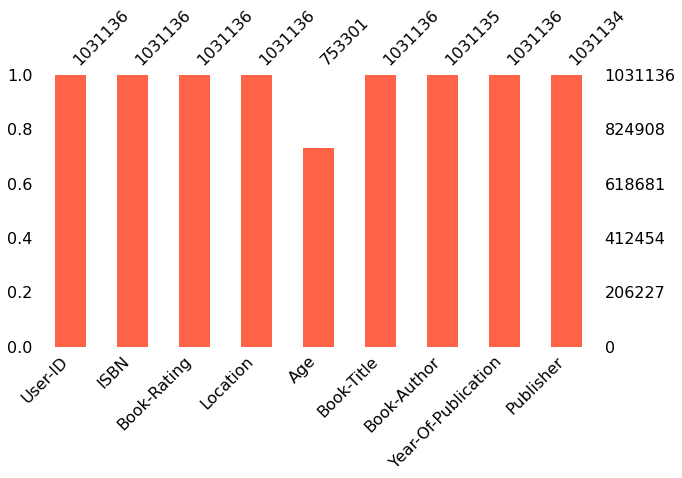

In [ ]:
# Visualizing the missing values
msno.bar(data,figsize=(10,5),color='Tomato')

### What did you know about your dataset?

Answer Here

## ***Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Location', 'Age', 'Book-Title',
       'Book-Author', 'Year-Of-Publication', 'Publisher'],
      dtype='object')

In [ ]:
# Dataset Describe
data.describe()

,User-ID,Book-Rating,Age
count,1.031136e+06,1.031136e+06,753301.000000
mean,1.405945e+05,2.839051e+00,37.397648
std,8.052466e+04,3.854157e+00,14.098254
min,2.000000e+00,0.000000e+00,0.000000
25%,7.041500e+04,0.000000e+00,28.000000
50%,1.412100e+05,0.000000e+00,35.000000
75%,2.114260e+05,7.000000e+00,45.000000
max,2.788540e+05,1.000000e+01,244.000000


### Variables Description 

Answer Here

## ***Data Warangling***

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
data.nunique()

User-ID                 92106
ISBN                   270151
Book-Rating                11
Location                22480
Age                       141
Book-Title             241071
Book-Author            101588
Year-Of-Publication       118
Publisher               16729
dtype: int64

In [ ]:
# Checking the unique values in Book Rating column
data['Book-Rating'].unique()

array([ 0,  5,  9,  8,  6,  7,  4, 10,  3,  2,  1])

In [ ]:
data['Year-Of-Publication'].unique()

array(['2002', '2001', '1996', '1999', '1998', '1994', '1995', '2003',
       '1997', '2024', '1992', '1983', '2000', '0', '1989', '1991',
       '1993', '1976', '1990', '1982', '1988', '1981', '1986', '1987',
       '1980', '2004', '1984', '1985', '1979', '1974', '1977', '1965',
       '1972', '1978', '1962', '1957', '1958', '1960', '1963', '1969',
       '1970', '1975', '1959', '1968', '1971', '1973', '1950', '1964',
       '1955', '1953', '1966', '1930', '1961', '1952', '1940', '1954',
       '1967', '1911', '1946', '1941', '1920', '1956', '1942', '1951',
       '1948', '2005', '1943', '1937', '1923', '1945', '1947', '1936',
       '1925', '1927', '2030', '2011', '2020', '1939', '1926', '1938',
       '1904', '1949', '1932', '1929', '1944', '1933', '1922', '1897',
       '2050', '1902', '1924', '1921', '1900', '2038', '2010', '1928',
       '2006', '1901', '2026', '2021', '1931', '1378', '1908',
       'DK Publishing Inc', 'Gallimard', '1909', '2012', '2008', '1935',
       '1376', 

In [ ]:
# seeing the observations with non numeric values in year of publication column
pd.set_option('display.max_colwidth', None)
data.query('`Year-Of-Publication` == "Gallimard" | `Year-Of-Publication` == "DK Publishing Inc"')

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher
911154,130571,0789466953,0,"summerville, south carolina, usa",NaN,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg
918145,137190,2070426769,0,"rennes, bretagne, france",31.0,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg
949657,169663,078946697X,0,"towson, maryland, usa",NaN,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
949658,227771,078946697X,7,"savion, n/a, israel",19.0,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg


In [157]:
# writing a function to swap the values in author, publisher and year of publication
def swap(index):
  author = re.findall(";(\D+)",data.at[index,'Book-Title'])
  year=data.at[index,'Book-Author']
  publisher=data.at[index,'Year-Of-Publication']
  book = re.sub('(\\";\D+")|(\\\\";\D+")',"",data.at[index,'Book-Title'])
  data.at[index,'Book-Title'] = book
  data.at[index,'Book-Author'] = author[0][:-1]
  data.at[index,'Publisher'] = publisher
  data.at[index,'Year-Of-Publication'] = year

# Getting the index of the observations with data shifted
shifted_observ = data.query('`Year-Of-Publication` == "Gallimard" | `Year-Of-Publication` == "DK Publishing Inc"').index

# swapping the misplaced data in the datframe using swap function created
for index in shifted_observ:
  swap(index)

In [ ]:
# Checking whether the changes are made correctly
data.loc[shifted_observ]

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher
911154,130571,0789466953,0,"summerville, south carolina, usa",NaN,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)",James Buckley,2000,DK Publishing Inc
918145,137190,2070426769,0,"rennes, bretagne, france",31.0,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard
949657,169663,078946697X,0,"towson, maryland, usa",NaN,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)",Michael Teitelbaum,2000,DK Publishing Inc
949658,227771,078946697X,7,"savion, n/a, israel",19.0,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)",Michael Teitelbaum,2000,DK Publishing Inc


In [158]:
# Converting the year of publishing column into int
data['Year-Of-Publication']=data['Year-Of-Publication'].astype(int)

In [159]:
# Finding the year with maximum books published
data['Year-Of-Publication'].value_counts()

2002    91800
2001    79801
1999    75194
2003    72539
2000    72329
        ...  
2008        1
2012        1
2024        1
1378        1
1910        1
Name: Year-Of-Publication, Length: 116, dtype: int64

In [160]:
# replacing columns having inappropriate years with 2002
data['Year-Of-Publication']=data['Year-Of-Publication'].apply(lambda x: 2002 if x>2022 else x)
data['Year-Of-Publication']=data['Year-Of-Publication'].apply(lambda x: 1900 if x<1900 else x)
data['Year-Of-Publication']=data['Year-Of-Publication'].apply(lambda x: 2002 if x==0 else x)
# Checking whether changes are made
print(f"Latest year of publication :{data['Year-Of-Publication'].max()}\nFirst year of publication :{data['Year-Of-Publication'].min()}")

Latest year of publication :2021
First year of publication :1900


In [161]:
# Creating a seperate column for Country
data['Country'] = data['Location'].str.extract('\D*,\D*,(\D+)')


In [162]:
# Checking the unique values in age column
data['Age'].unique()

array([ nan,  23.,  34.,   2.,  45.,  24.,  36.,  35.,  51.,  39.,  52.,
        72.,  30.,  46.,  41.,  33.,  29.,  21.,  38.,  63.,  26.,  59.,
        44.,   1.,  25.,  54.,  27.,  28.,  16.,  20.,  17.,  56.,  32.,
        61.,  53.,  31.,  40.,  37.,  43.,  50.,  15.,  19., 201.,  49.,
        47.,  60.,  69.,  42.,  22.,  18.,  64.,  58.,  68.,  48.,  14.,
        62.,  71.,  57., 204., 209.,   9.,  67.,  55.,   0., 101.,  66.,
       116.,  13.,  75.,  70., 103., 220.,  65.,  83.,  11.,  10.,  12.,
         8.,  76., 200.,  73.,  92.,  80.,  79., 223.,  90., 100.,   7.,
        74.,   3.,  77., 104.,  85.,  82., 128.,  81., 140., 152.,  84.,
       239.,  78., 148.,  97.,   5., 168.,   4., 151., 147., 136., 228.,
        99.,  98.,  93.,  94., 114., 157., 133., 141., 108.,  86., 237.,
        96., 146., 212., 219., 124., 229.,  89., 226.,   6., 244., 105.,
       199., 123., 118., 156., 138.,  95., 132., 127., 109., 107.])

In [163]:
# Finding the mean age to fill in the nan values and in appropriate values in age column
mean_age = round(data.query('Age <= 80 and Age >=15')['Age'].mean())

# replacing the inappropriate age data with the mean value
data['Age']=data['Age'].apply(lambda x: mean_age if x>80 and x<15 else x)
data['Age'] = data['Age'].fillna(mean_age)

In [164]:
# Checking whether we still have any null values in the age column
data['Age'].isna().sum()

0

## ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
# Creating a function to annotate
def annotate(ax,y='h'):
  if y == 'v':
    for n in ax.patches:
      ax.annotate(int(n.get_height()),(n.get_x()+n.get_width()/2,n.get_height()),ha='center',size=14)
  else:
    for p in ax.patches:
      ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),xytext=(5, 0), textcoords='offset points', ha="left", va="center")

# Creating a function to set figure size
def figsize(x=12,y=8):
  plt.figure(figsize=(x,y))

# Creating a function to set set title and label
def label_title(t,x=None,y=None,z=None):
  t.set_title(x,fontsize=20)
  t.set_xlabel(y,fontsize=15)
  t.set_ylabel(z,fontsize=15)

#### **Chart - 1 Top 10 Countries with maximum number of users**

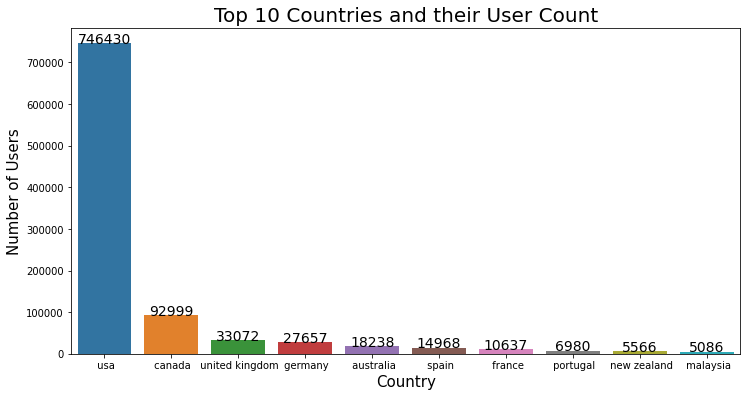

In [ ]:
# Creating a Data Frame for top Countries with the maximum number of users
country = pd.DataFrame(data['Country'].value_counts()[:11]).reset_index()
country.rename(columns={'index':'Country','Country':'Number of Users'},inplace=True)

# Visualizing the users from different countries plot
figsize(12,6)
country_ = sns.barplot(data=country.query("Country != ' n/a'"),x='Country',y='Number of Users')
annotate(country_,'v')
label_title(country_,'Top 10 Countries and their User Count','Country','Number of Users')
plt.show()

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [ ]:
data.head()

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Country
0,276725,034545104X,0,"tyler, texas, usa",37.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,usa
1,2313,034545104X,5,"cincinnati, ohio, usa",23.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,usa
2,6543,034545104X,0,"strafford, missouri, usa",34.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,usa
3,8680,034545104X,5,"st. charles county, missouri, usa",2.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,usa
4,10314,034545104X,9,"beaverton, oregon, usa",37.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,usa


#### **Chart - 2 Top 15 maximum reviewed books**

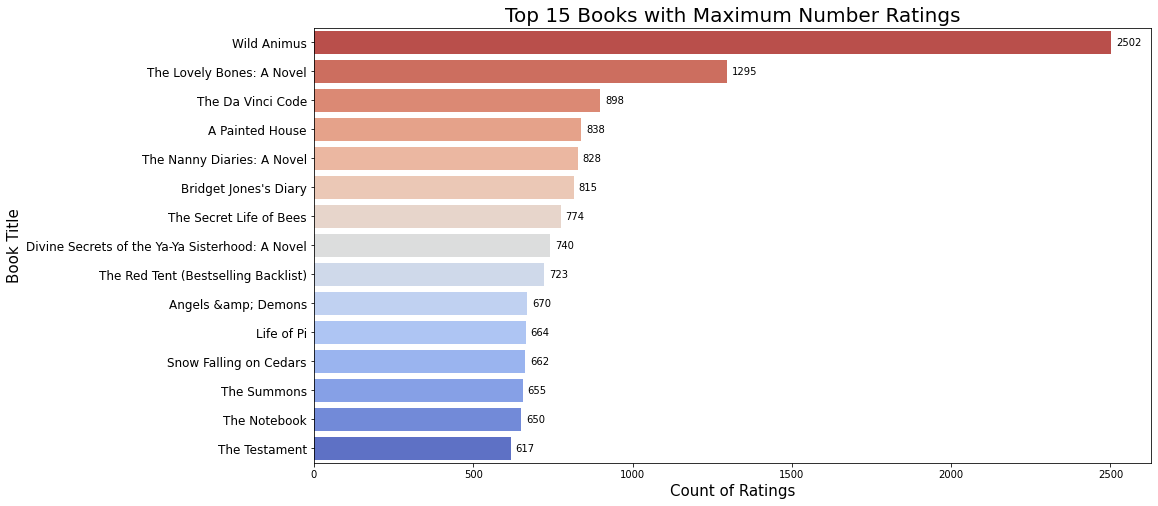

In [ ]:
# Creating a Data Frame for books with maximum number of ratings
top_books=pd.DataFrame(data.groupby('Book-Title')['Book-Rating'].count().sort_values(ascending=False)).reset_index().rename(columns={'index':'Book-Title','Book-Rating':'Count'})

# Code to visualize the plot for books with maximum number of ratings
figsize(15,8)
books=sns.barplot(data=top_books[:15],y='Book-Title',x='Count',palette='coolwarm_r')
annotate(books)
plt.yticks(fontsize=12)
label_title(books,'Top 15 Books with Maximum Number Ratings','Count of Ratings','Book Title')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 3 Top 10 Authors with Maximum reviewed books**

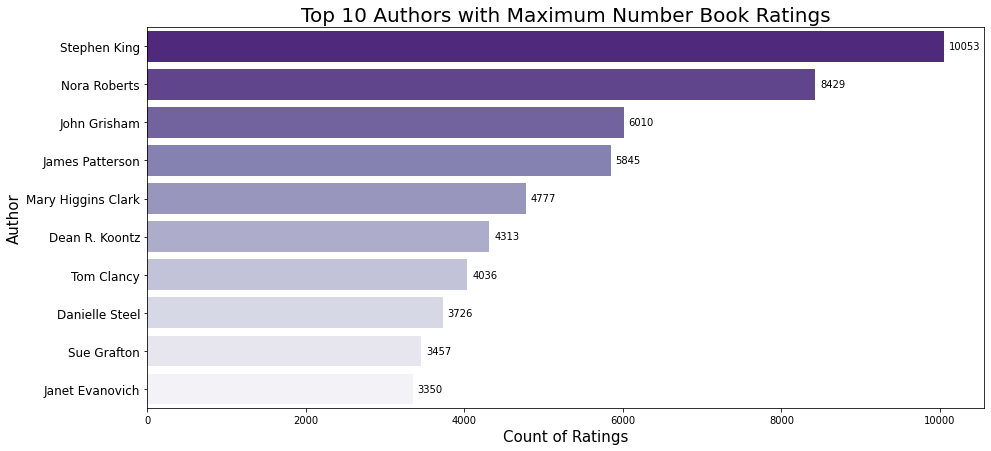

In [ ]:
# Creating a Data Frame for authors with maximum number of ratings
top_authors=pd.DataFrame(data.groupby('Book-Author')['Book-Rating'].count().sort_values(ascending=False)).reset_index()

# Code to visualize the plot for Authors with maximum number of ratings
figsize(15,7)
author=sns.barplot(data=top_authors[:10],x='Book-Rating',y='Book-Author',palette='Purples_r')
annotate(author)
plt.yticks(fontsize=12)
label_title(author,'Top 10 Authors with Maximum Number Book Ratings','Count of Ratings','Author')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 4 Top 10 Publishers with Maximum reviewed books**

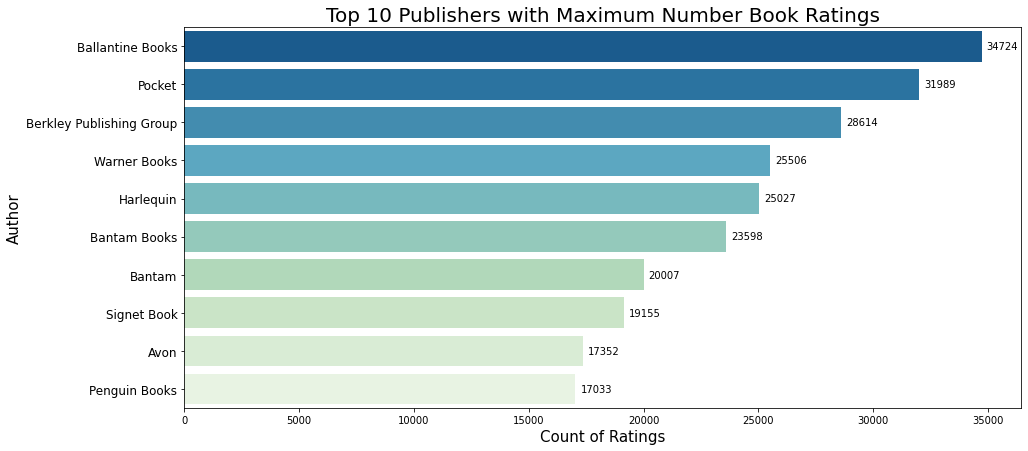

In [ ]:
# Creating a Data Frame for authors with maximum number of ratings
top_publisher=pd.DataFrame(data.groupby('Publisher')['Book-Rating'].count().sort_values(ascending=False)).reset_index()

# Code to visualize the plot for Authors with maximum number of ratings
figsize(15,7)
Publisher=sns.barplot(data=top_publisher[:10],x='Book-Rating',y='Publisher',palette='GnBu_r')
annotate(Publisher)
plt.yticks(fontsize=12)
label_title(Publisher,'Top 10 Publishers with Maximum Number Book Ratings','Count of Ratings','Author')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 5 Number of Books Published in different Years**

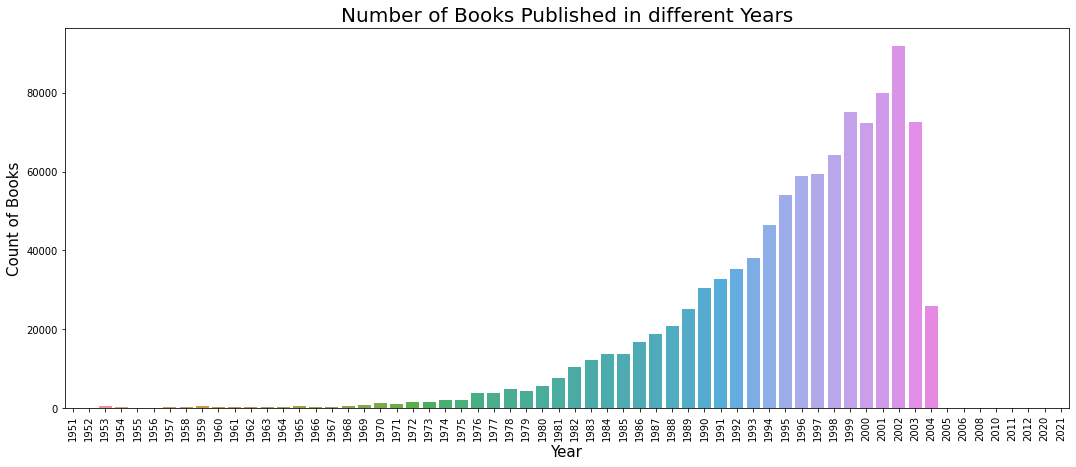

In [ ]:
# Visualization code for Number of Books Published in different Years
year=data.query('`Year-Of-Publication`>1950')
figsize(18,7)
years = sns.countplot(data=year,x='Year-Of-Publication')
plt.xticks(rotation=90)
label_title(years,'Number of Books Published in different Years','Year','Count of Books')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 5 Count of different Ratings for the books**

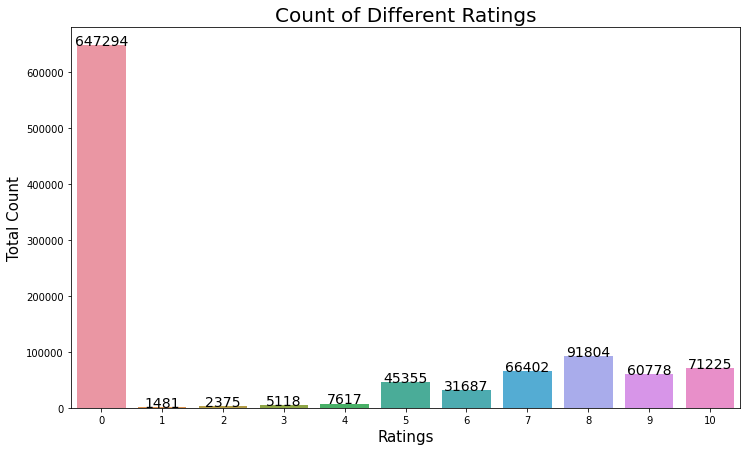

In [ ]:
# Visualization code for Number of Books Published in different Years
figsize(12,7)
ratings = sns.countplot(data=data,x='Book-Rating')
label_title(ratings,'Count of Different Ratings','Ratings','Total Count')
annotate(ratings,'v')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## ***ML Model Implementation***

### **Collaborative filtering**

In [ ]:
# Removing the users with mean rating as zero
user_data=data.copy()
rating_mean=data.groupby('User-ID')['Book-Rating'].mean().reset_index().rename(columns={'Book-Rating':'mean_rating'})
user_data=user_data.merge(rating_mean,on='User-ID')
user_data=user_data[user_data['mean_rating']!=0]
user_data.drop(columns='mean_rating',inplace=True)
# Checking the shape of the dataframe
print(f'DataFrame shape with mean rating of zero: {data.shape} \nDataFrame shape without mean rating of zero: {user_data.shape}')

DataFrame shape with mean rating of zero: (1031136, 10) 
DataFrame shape without mean rating of zero: (987511, 10)


In [ ]:
user_data['book_index'] = user_data['Book-Title'].astype('category').cat.codes
matrix=coo_matrix((user_data['Book-Rating'],(user_data['User-ID'],user_data['book_index'])))
mat_csr=matrix.tocsr()

In [ ]:

#books['adjusted_count']=books['Count']*(books['Count']/books['Mean_rating'])
#books['Score']=books['Mean_rating']*books['adjusted_count']

In [ ]:
def similar_user_recommendation(user_id):
  similarity=cosine_similarity(mat_csr[user_id],mat_csr).flatten()
  similar_users = similarity.argsort()[-21:-1]
  similar_User=user_data[user_data['User-ID'].isin(similar_users)]
  books=similar_User.groupby('Book-Title').agg({'ISBN':'count','Book-Rating':'mean'}).sort_values(by=['ISBN','Book-Rating'],ascending=[False,False]).reset_index().rename(columns={'ISBN':'Count','Book-Rating':'Mean_rating'})
  books_read=(user_data[user_data['User-ID']==user_id]['Book-Title'].unique()).tolist()
  final = books[~books['Book-Title'].isin(books_read)]
  recommendation=pd.DataFrame((final[final['Mean_rating']>4]['Book-Title']).reset_index(drop=True)).rename(columns={'Book-Title':'Top Book Recommendations'})
  return recommendation[:5]



In [ ]:
user_data['User-ID'].loc[800]

23768

In [ ]:
similar_user_recommendation(23768)

,Top Book Recommendations
0,Plainsong
1,The Poky Little Puppy's Busy Counting Book (Super Shape)
2,Alice's Tulips
3,Concubines Children
4,Too Close to the Falls: A Memoir


In [167]:
books_df=(data[['ISBN','Book-Title']].copy()).drop_duplicates()

### **Model 2 - SVD**

In [55]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=3366470 sha256=06b09c528ac3e2c6db7ebe204633498c37245f344b3389fc878a7f52b6fe4e23
  Stored in directory: /root/.cache/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise


In [76]:
import surprise
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import train_test_split,cross_validate
from surprise import accuracy
from surprise import SVD

In [172]:
# Loading the dataframe into surprise
reader=Reader(rating_scale=(0,10))
data=Dataset.load_from_df(data[['User-ID','ISBN','Book-Rating']],reader)

# Splitting the dataset into train and test set
train_data,teat_data=train_test_split(data,test_size=0.2)

In [173]:
# Splitting the dataset into train and test set
train_data,test_data=train_test_split(data,test_size=0.2)

In [174]:
svd_model=SVD()
svd_predictions =svd_model.fit(train_data).test(teat_data)

In [238]:
svd_predictions[:10]

[Prediction(uid=58746, iid='0385314744', r_ui=0.0, est=0, details={'was_impossible': False}),
 Prediction(uid=244070, iid='0807073059', r_ui=10.0, est=5.48698517342855, details={'was_impossible': False}),
 Prediction(uid=171986, iid='0330244078', r_ui=0.0, est=0.3879063715066686, details={'was_impossible': False}),
 Prediction(uid=211610, iid='2020255758', r_ui=8.0, est=7.21537472489246, details={'was_impossible': False}),
 Prediction(uid=30276, iid='0446300586', r_ui=0.0, est=2.606882016716353, details={'was_impossible': False}),
 Prediction(uid=6323, iid='0553102346', r_ui=7.0, est=6.399249850448713, details={'was_impossible': False}),
 Prediction(uid=134784, iid='0684862719', r_ui=8.0, est=7.526388601733167, details={'was_impossible': False}),
 Prediction(uid=50764, iid='0451450957', r_ui=6.0, est=4.7874307536597165, details={'was_impossible': False}),
 Prediction(uid=7915, iid='0312976275', r_ui=10.0, est=10, details={'was_impossible': False}),
 Prediction(uid=211961, iid='00644610

In [90]:
from collections import defaultdict

In [235]:
def top_recommendations(predictions,id, n=10):
    
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        if uid == id:
          top_n[id].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    isbn_list=[]
    for i in range(0,len(top_n[uid])):
      isbn_list.append(top_n[uid][i][0])
    
    recommendations=pd.DataFrame()
    for i in isbn_list:
      recommendations=recommendations.append(books_df[books_df['ISBN']==i])
    recommendations.reset_index(drop=True,inplace=True)
    
    return recommendations

In [236]:
top_recommendations(svd_predictions,115572,n=10)

,ISBN,Book-Title
0,043935806X,Harry Potter and the Order of the Phoenix (Book 5)
1,0553269216,Rainbow Valley (Anne of Green Gables Novels (Paperback))
2,0553213164,Anne of Windy Poplars (Anne of Green Gables Novels (Paperback))
3,0060563079,Peter Pan: The Original Story (Peter Pan)
4,0345339738,"The Return of the King (The Lord of the Rings, Part 3)"
5,0385323301,Where the Red Fern Grows: The Story of Two Dogs and a Boy
6,0553212737,Emma
7,0805000313,Never Sniff a Gift Fish
8,0446672211,Where the Heart Is (Oprah's Book Club (Paperback))
9,0805029222,The Good Samaritan Strikes Again
